### Imports

In [9]:
import os
import math

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
"""
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
"""

'\nfrom plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot\nimport cufflinks as cf\ninit_notebook_mode(connected=True)\ncf.go_offline()\n'

### Correlation

In [12]:
def merge_to_base(df_base, df_add):
    df_add = df_add.drop(['county','state'], axis=1)
    df_base = df_base.merge(df_add, how='inner', on='fips')
    return df_base

In [13]:
def draw_correlation_heatmap(df_combined):
    df_correlate = df_combined.drop(['fips','county','state'], axis=1)
    df_correlate = df_correlate.dropna()
    sns.set(font_scale=1)
    plt.subplots(figsize=(15,13))
    sns.heatmap(df_correlate.corr(), cmap='coolwarm', center=0, annot=True)

### Path

In [14]:
path_input = '00_data_input'
path_temp = '01_data_temp'
path_inter = '02_data_intermediate'
path_output = '03_data_output'
path_atlas = os.path.join(path_input, 'food_atlas.xls')

### Base Health Data - Obesity

In [15]:
df_health = pd.read_csv(os.path.join(path_output, 'health_data.csv'))
df_health = df_health.drop(['PCT_obese_adults_2008','PCT_diabetes_adults_2008'], axis=1)
df_health.head()

,fips,county,state,PCT_obese_adults_2013,PCT_diabetes_adults_2013
0,1001,Autauga,AL,34.1,13.0
1,1003,Baldwin,AL,27.4,10.4
2,1005,Barbour,AL,44.4,18.4
3,1007,Bibb,AL,40.3,14.8
4,1009,Blount,AL,34.6,14.1


### Ethnical Groups

In [16]:
df_ethnical = pd.read_csv(os.path.join(path_output, 'ethnical_data.csv'))
df_ethnical.head()

,fips,county,state,PCT_white_2010,PCT_black_2010,PCT_hispanic_2010,PCT_asian_2010,PCT_native_2010,PCT_pacific_2010
0,1001,Autauga,AL,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314
1,1003,Baldwin,AL,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343
2,1005,Barbour,AL,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409
3,1007,Bibb,AL,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548
4,1009,Blount,AL,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402


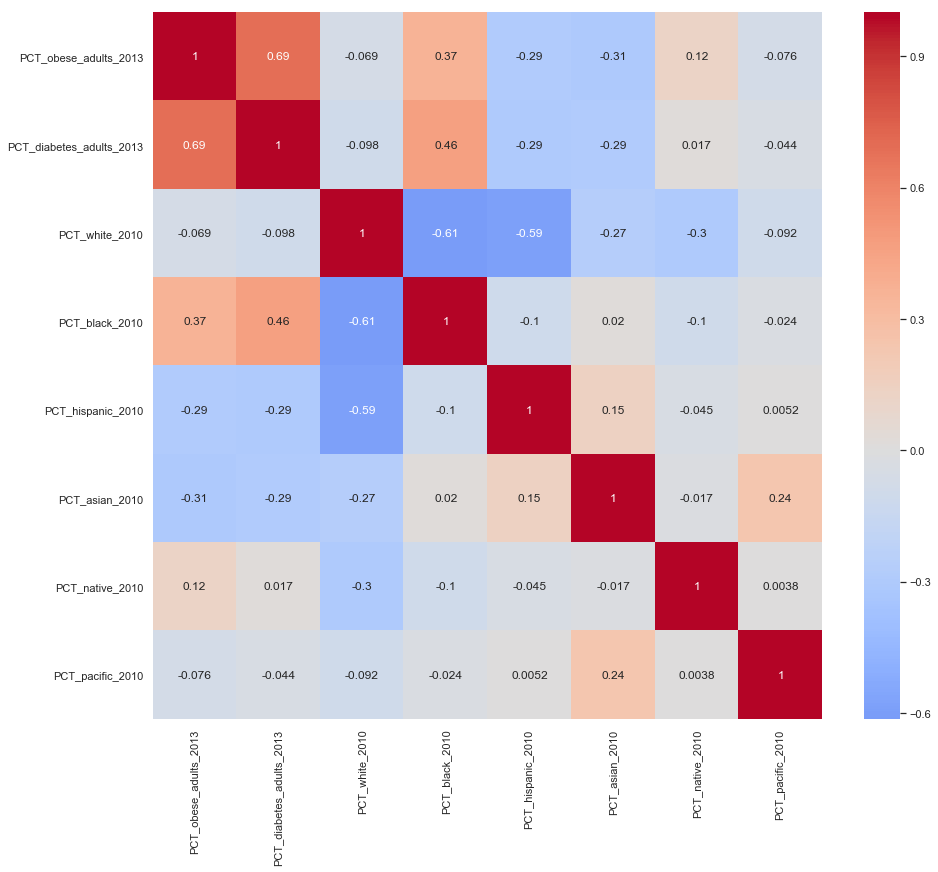

In [17]:
df = merge_to_base(df_health, df_ethnical)
draw_correlation_heatmap(df)

### Poverty & Income

In [18]:
df_poverty = pd.read_csv(os.path.join(path_output, 'poverty_data.csv'))
df_poverty.head()

,fips,county,state,PCT_poverty_rate_2015,PCT_poverty_rate_2015_children,persistent_poverty_2010,persistent_child_poverty_2010,MEDIAN_houshold_income_2015
0,1001,Autauga,AL,12.7,18.8,0,0,56580.0
1,1003,Baldwin,AL,12.9,19.6,0,0,52387.0
2,1005,Barbour,AL,32.0,45.2,1,1,31433.0
3,1007,Bibb,AL,22.2,29.3,0,1,40767.0
4,1009,Blount,AL,14.7,22.2,0,0,50487.0


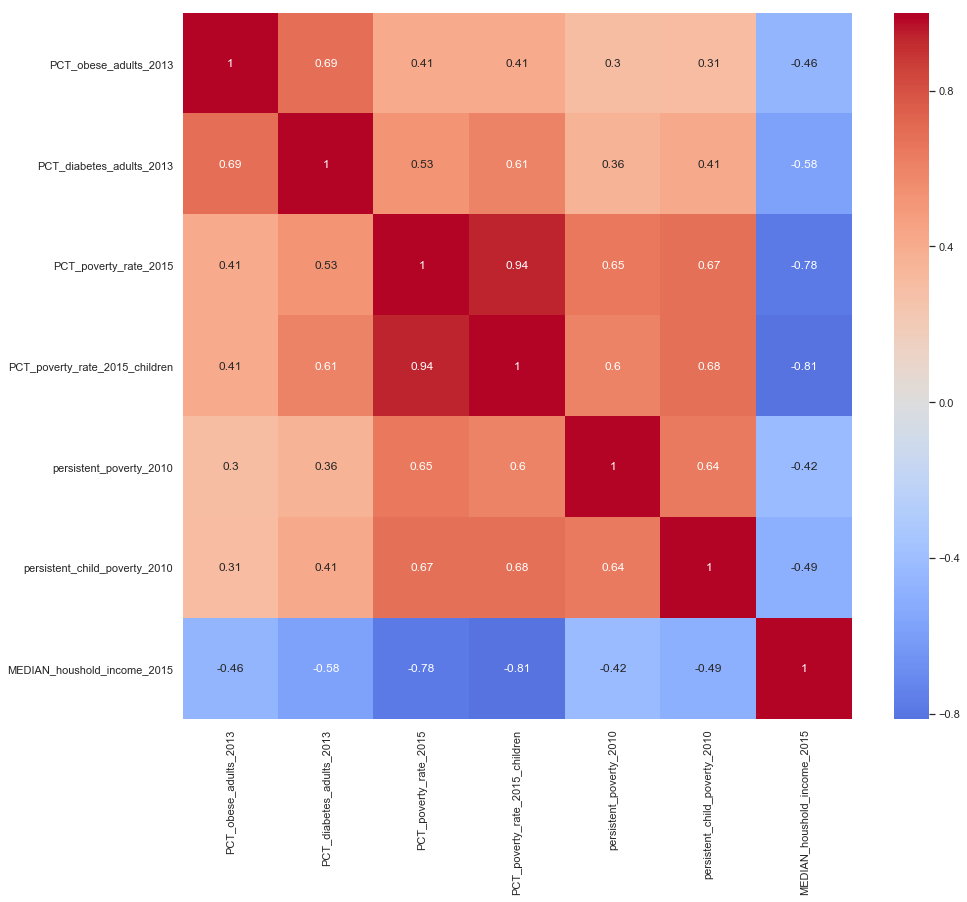

In [19]:
df = merge_to_base(df_health, df_poverty)
draw_correlation_heatmap(df)

### Population

In [20]:
df_population = pd.read_csv(os.path.join(path_output, 'population_data.csv'))
df_population.head()

,fips,county,state,CNT_population_2013,SQM_total_area_2000,PSM_population_density_2013,metropolitain_area_2013
0,1001,Autauga,AL,54792,604.45,90.647696,1
1,1003,Baldwin,AL,195147,2026.93,96.277128,1
2,1005,Barbour,AL,26938,904.52,29.781542,0
3,1007,Bibb,AL,22501,626.16,35.934905,1
4,1009,Blount,AL,57746,650.60,88.758069,1


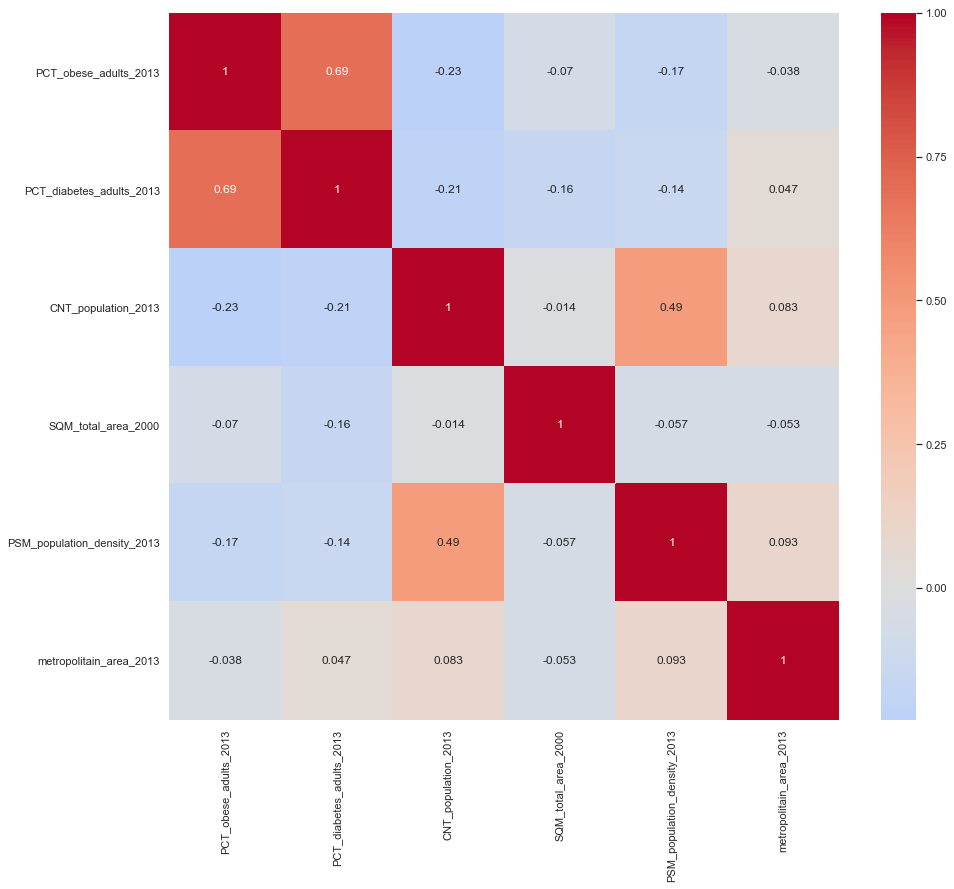

In [21]:
df = merge_to_base(df_health, df_population)
draw_correlation_heatmap(df)

### Fitness

In [22]:
df_fitness = pd.read_csv(os.path.join(path_output, 'fitness_data.csv'))
df_fitness.head()

,fips,county,state,CNT_fitness_facilities_2009,CNT_fitness_facilities_2014,CPT_fitness_facilities_2009,CPT_fitness_facilities_2014,*CNT_fitness_facilities_2013,*CPT_fitness_facilities_2013
0,1001,Autauga,AL,4,5,0.073889,0.090261,5.0,0.086987
1,1003,Baldwin,AL,18,25,0.100331,0.124931,24.0,0.120011
2,1005,Barbour,AL,1,0,0.036157,0.000000,0.0,0.007231
3,1007,Bibb,AL,1,1,0.043590,0.044433,1.0,0.044264
4,1009,Blount,AL,3,3,0.052319,0.051976,3.0,0.052045


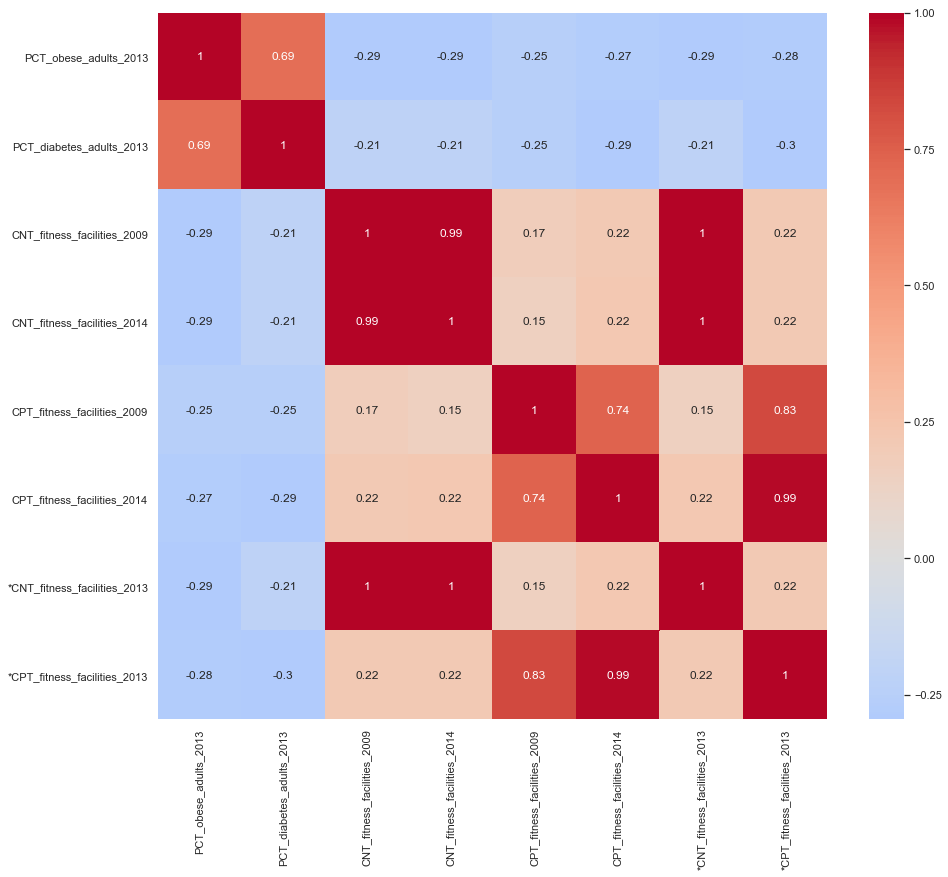

In [23]:
df = merge_to_base(df_health, df_fitness)
draw_correlation_heatmap(df)

### Store Access

In [24]:
df_access = pd.read_csv(os.path.join(path_output, 'store_access_data.csv'))
df_access.head()

,fips,county,state,PCT_low_access_fullPop_2010,PCT_low_access_fullPop_2015,PCT_low_access_lowInc_2010,PCT_low_access_lowInc_2015,PCT_low_access_noCar_2010,PCT_low_access_noCar_2015,PCT_low_access_snap_2015,*PCT_low_access_fullPop_2013,*PCT_low_access_lowInc_2013,*PCT_low_access_noCar_2013
0,1001,Autauga,AL,33.769657,32.062255,9.793530,11.991125,3.284786,3.351332,4.608749,32.403735,11.551606,3.338022
1,1003,Baldwin,AL,19.318473,16.767489,5.460261,5.424427,2.147827,1.905114,1.298900,17.277686,5.431593,1.953657
2,1005,Barbour,AL,20.840972,22.105560,11.420316,10.739667,4.135869,4.329378,4.303147,21.852642,10.875796,4.290676
3,1007,Bibb,AL,4.559753,4.230324,2.144661,2.601627,3.458580,2.821427,0.676710,4.296210,2.510234,2.948858
4,1009,Blount,AL,2.700840,6.497380,1.062468,2.880150,3.269380,3.336414,0.812727,5.738072,2.516613,3.323007


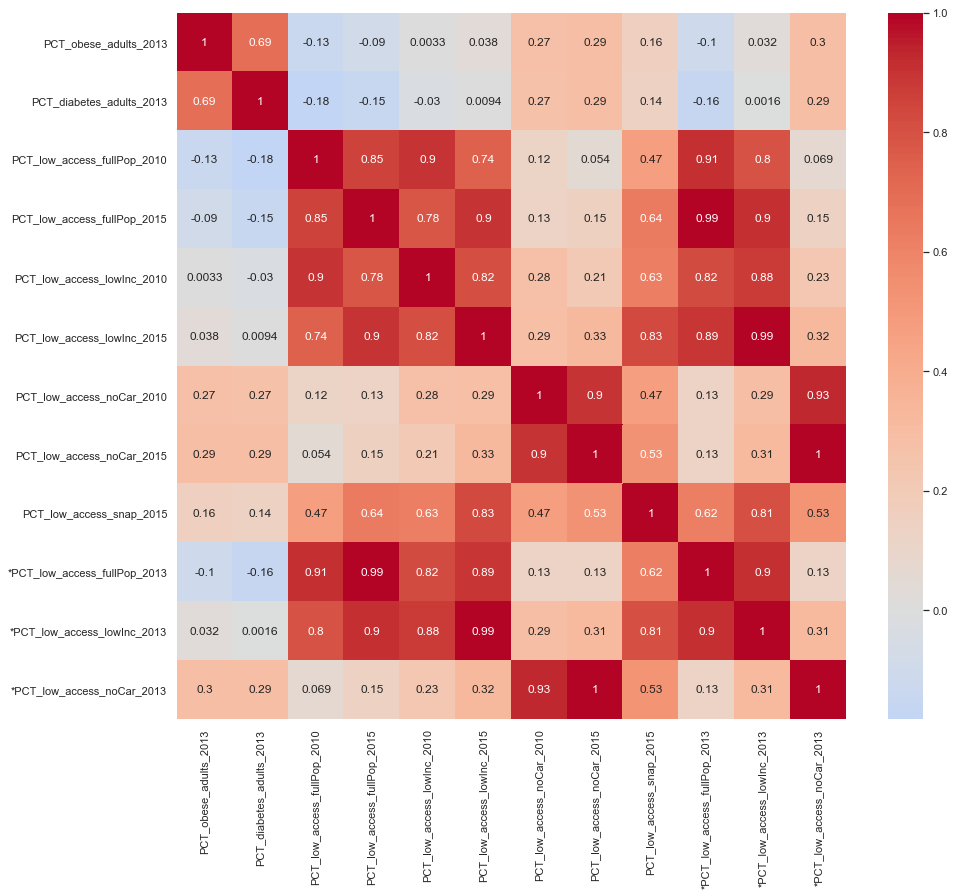

In [25]:
df = merge_to_base(df_health, df_access)
draw_correlation_heatmap(df)

### Age Groups

In [26]:
df_age = pd.read_csv(os.path.join(path_output, 'age_data.csv'))
df_age.head()

,fips,county,state,PCT_older_65_2010,PCT_younger_18_2010
0,1001,Autauga,AL,11.995382,26.777959
1,1003,Baldwin,AL,16.771185,22.987408
2,1005,Barbour,AL,14.236807,21.906982
3,1007,Bibb,AL,12.681650,22.696923
4,1009,Blount,AL,14.722096,24.608353


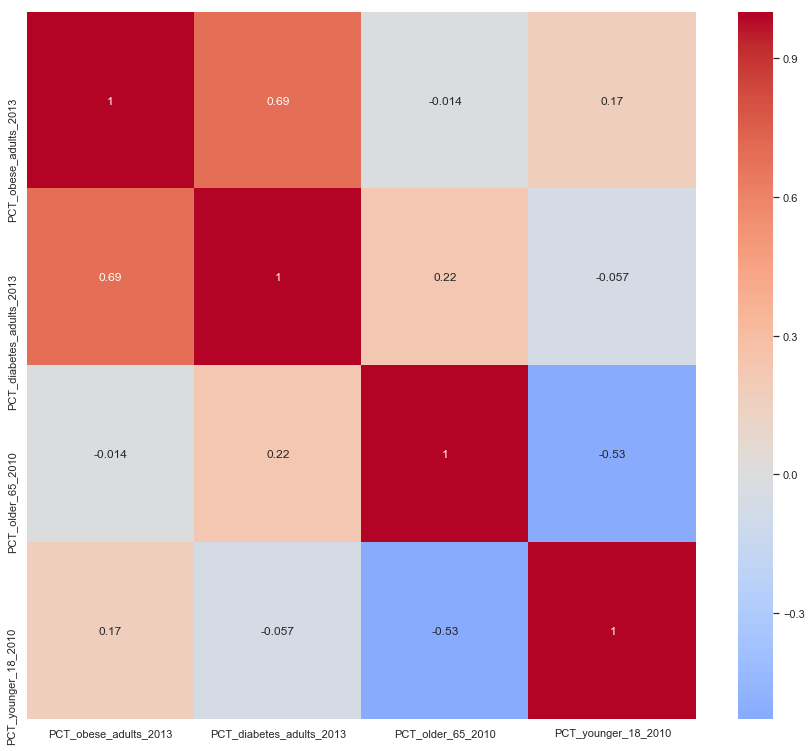

In [27]:
df = merge_to_base(df_health, df_age)
draw_correlation_heatmap(df)

### Stores / Availability of stores

In [28]:
df_atlas = pd.read_excel(path_atlas, sheet_name='STORES')
df_stores = df_atlas[['FIPS', 'County', 'State', 'GROCPTH14', 'SUPERCPTH14', 'CONVSPTH14', 'SPECSPTH14', 'SNAPSPTH12', 'WICSPTH12']].copy()

df_stores.rename(columns={'FIPS': 'fips', 'County': 'county', 'State': 'state', 'GROCPTH14':'CPT_grocery_stores_2014','SUPERCPTH14':'CPT_supercenters_2014','CONVSPTH14':'CPT_convenience_stores_2014', 'SPECSPTH14':'CPT_specialized_stores_2014', 'SNAPSPTH12':'CPT_snap_authorized_stores_2012', 'WICSPTH12':'CPT_wic_authorized_stores_2012'}, inplace=True)
df_stores.head()

,fips,county,state,CPT_grocery_stores_2014,CPT_supercenters_2014,CPT_convenience_stores_2014,CPT_specialized_stores_2014,CPT_snap_authorized_stores_2012,CPT_wic_authorized_stores_2012
0,1001,Autauga,AL,0.072209,0.018052,0.541565,0.036104,0.674004,0.090067
1,1003,Baldwin,AL,0.144920,0.029983,0.589673,0.129928,0.725055,0.141517
2,1005,Barbour,AL,0.185963,0.037193,0.706661,0.074385,1.280590,0.257344
3,1007,Bibb,AL,0.222163,0.044433,0.666489,0.044433,0.719122,0.221268
4,1009,Blount,AL,0.103952,0.017325,0.467784,0.000000,0.657144,0.103760


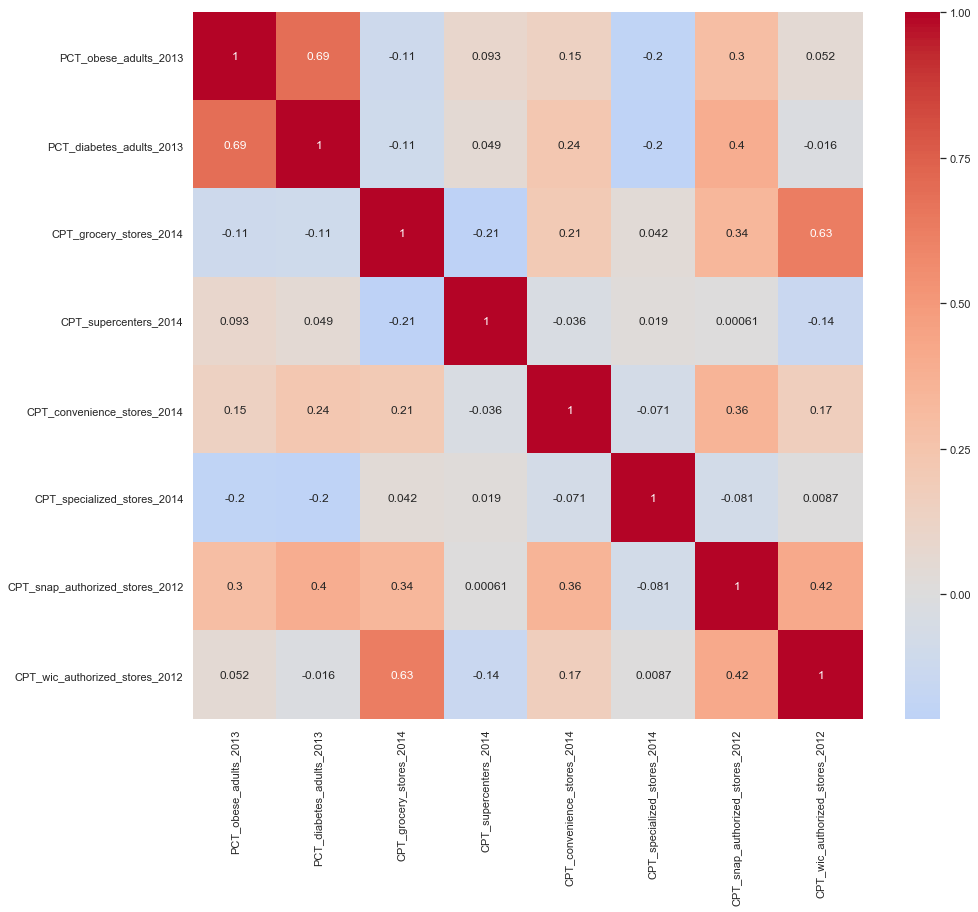

In [29]:
df = merge_to_base(df_health, df_stores)
draw_correlation_heatmap(df)
df_stores.to_csv(os.path.join(path_output, 'stores_availability_data.csv'))

### Restaurants

In [30]:
df_atlas = pd.read_excel(path_atlas, sheet_name='RESTAURANTS')
df_restaurant = df_atlas[['FIPS', 'County', 'State', 'FFRPTH14', 'FSRPTH14']].copy()

df_restaurant.rename(columns={'FIPS': 'fips', 'County': 'county', 'State': 'state', 'FFRPTH14':'CPT_fast_food_restaurants_2014','FSRPTH14':'CPT_full_service_restaurants_2014'}, inplace=True)
df_restaurant.head()

,fips,county,state,CPT_fast_food_restaurants_2014,CPT_full_service_restaurants_2014
0,1001,Autauga,AL,0.649878,0.523513
1,1003,Baldwin,AL,0.659634,1.104387
2,1005,Barbour,AL,0.818239,0.557890
3,1007,Bibb,AL,0.222163,0.222163
4,1009,Blount,AL,0.363832,0.259880


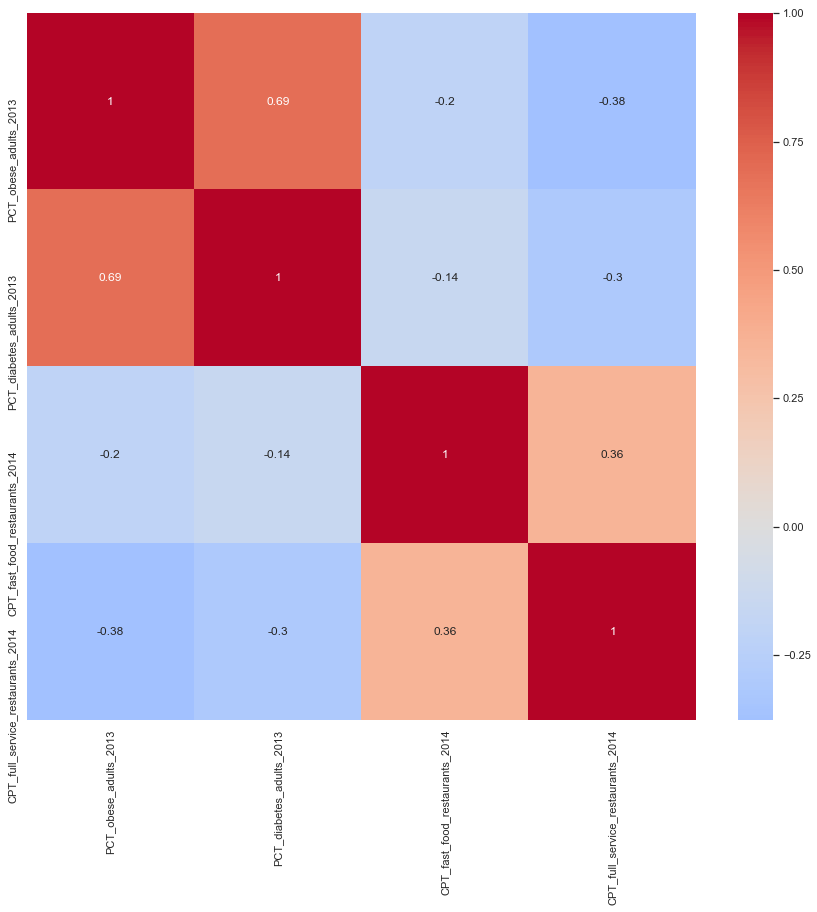

In [31]:
df = merge_to_base(df_health, df_restaurant)
draw_correlation_heatmap(df)
df_restaurant.to_csv(os.path.join(path_output, 'restaurants_data.csv'))

### Insecurity

In [32]:
df_atlas = pd.read_excel(path_atlas, sheet_name='INSECURITY')
df_insecurity = df_atlas[['FIPS', 'County', 'State', 'FOODINSEC_13_15', 'VLFOODSEC_13_15', 'FOODINSEC_CHILD_03_11']].copy()

df_insecurity.rename(columns={'FIPS': 'fips', 'County': 'county', 'State': 'state', 'FOODINSEC_13_15':'PCT_food_insecurity_2014*','VLFOODSEC_13_15':'PCT_low_food_security_2014*', 'FOODINSEC_CHILD_03_11':'PCT_child_food_insecurity*'}, inplace=True)
df_insecurity.head()

,fips,county,state,PCT_food_insecurity_2014*,PCT_low_food_security_2014*,PCT_child_food_insecurity*
0,1001,Autauga,AL,17.6,7.3,9.3
1,1003,Baldwin,AL,17.6,7.3,9.3
2,1005,Barbour,AL,17.6,7.3,9.3
3,1007,Bibb,AL,17.6,7.3,9.3
4,1009,Blount,AL,17.6,7.3,9.3


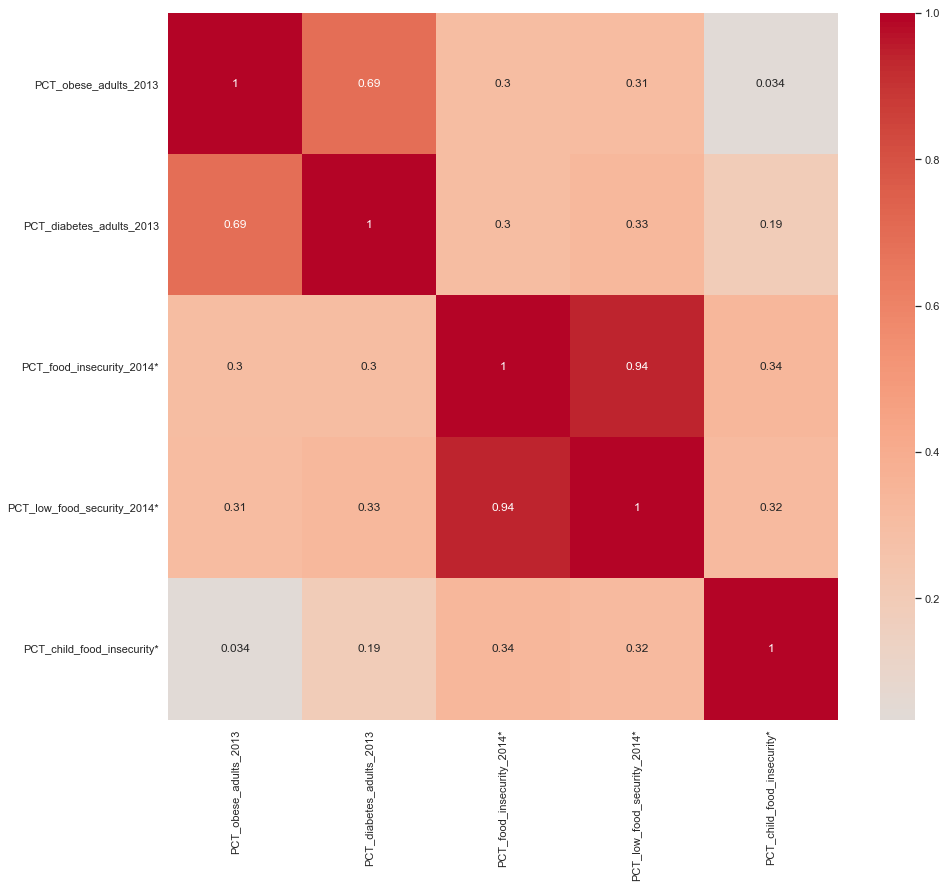

In [33]:
df = merge_to_base(df_health, df_insecurity)
draw_correlation_heatmap(df)
df_insecurity.to_csv(os.path.join(path_output, 'insecurity_data.csv'))

### Local

In [34]:
df_atlas = pd.read_excel(path_atlas, sheet_name='LOCAL')
df_local = df_atlas[['FIPS', 'County', 'State', 'DIRSALES_FARMS12', 'PCT_LOCLFARM12', 'PCT_LOCLSALE12', 'FMRKTPTH16', 'FRESHVEG_FARMS12', 'FRESHVEG_ACRESPTH12']].copy()

df_local.rename(columns={'FIPS': 'fips', 'County': 'county', 'State': 'state', 'DIRSALES_FARMS12':'ABS_farms_direct_sales_2012','PCT_LOCLFARM12':'PCT_farms_direct_sales_2012', 'PCT_LOCLSALE12':'PCT_direct_farm_sales_2012', 'FMRKTPTH16':'CPT_farmer_markets_2016', 'FRESHVEG_FARMS12':'ABS_farms_vegetables_fresh_market_2012', 'FRESHVEG_ACRESPTH12':'CPT_vegetables_acres_fresh_market_2012'}, inplace=True)
df_local.head()

,fips,county,state,ABS_farms_direct_sales_2012,PCT_farms_direct_sales_2012,PCT_direct_farm_sales_2012,CPT_farmer_markets_2016,ABS_farms_vegetables_fresh_market_2012,CPT_vegetables_acres_fresh_market_2012
0,1001,Autauga,AL,51.0,13.110540,1.554692,0.018045,43.0,NaN
1,1003,Baldwin,AL,103.0,10.414560,0.478010,0.019179,50.0,NaN
2,1005,Barbour,AL,13.0,2.276708,0.012457,0.154054,7.0,1.509628
3,1007,Bibb,AL,13.0,6.878307,NaN,0.044164,10.0,0.529989
4,1009,Blount,AL,88.0,7.091056,0.277792,0.017330,59.0,11.319579


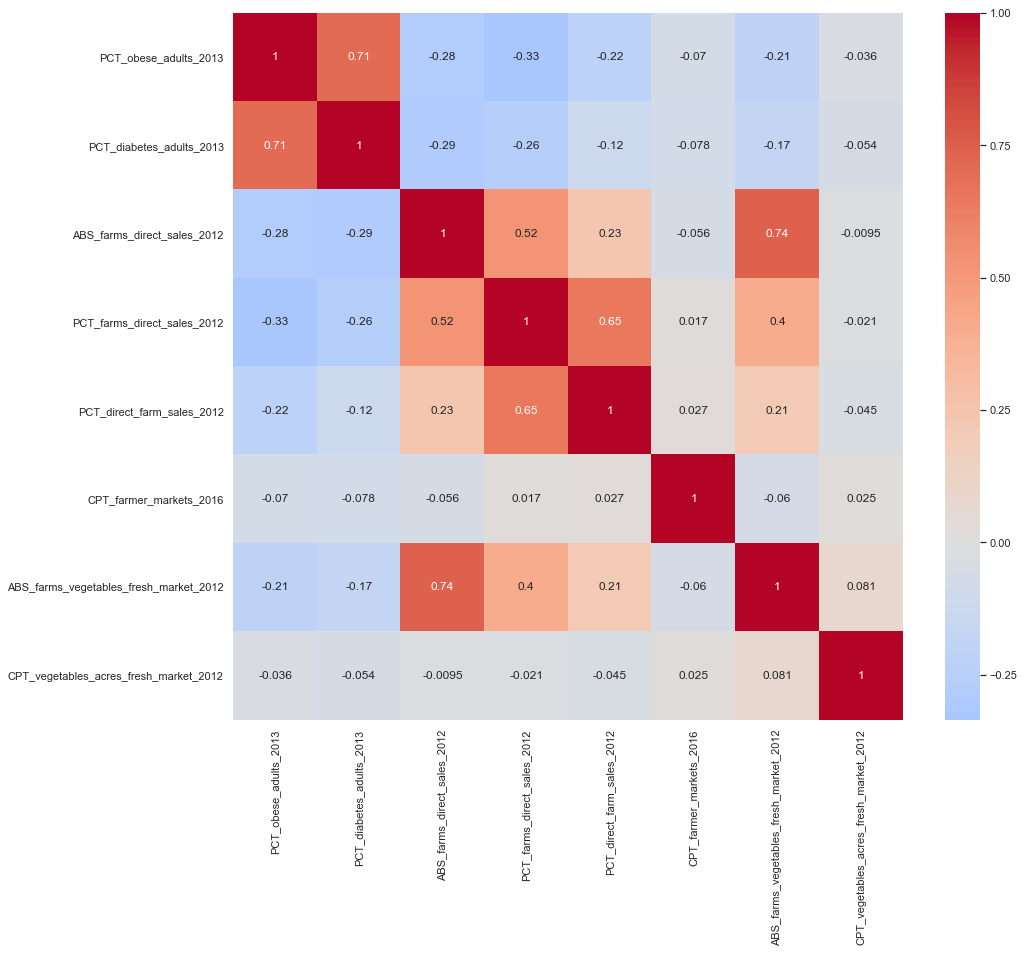

In [35]:
df = merge_to_base(df_health, df_local)
draw_correlation_heatmap(df)
df_local.to_csv(os.path.join(path_output, 'local_farms_data.csv'))

# Linear Regression

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

Merging all relevant columns to one data file

,fips,county,state,PCT_obese_adults_2013,PCT_diabetes_adults_2013,PCT_poverty_rate_2015,*CPT_fitness_facilities_2013,*PCT_low_access_noCar_2013,CPT_snap_authorized_stores_2012,PCT_food_insecurity_2014*,PCT_low_food_security_2014*,PCT_farms_direct_sales_2012,PCT_white_2010,PCT_black_2010,PCT_hispanic_2010,PCT_asian_2010,PCT_native_2010,PCT_pacific_2010
0,1001,Autauga,AL,34.1,13.0,12.7,0.086987,3.338022,0.674004,17.6,7.3,13.110540,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314
1,1003,Baldwin,AL,27.4,10.4,12.9,0.120011,1.953657,0.725055,17.6,7.3,10.414560,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343
2,1005,Barbour,AL,44.4,18.4,32.0,0.007231,4.290676,1.280590,17.6,7.3,2.276708,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409
3,1007,Bibb,AL,40.3,14.8,22.2,0.044264,2.948858,0.719122,17.6,7.3,6.878307,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548
4,1009,Blount,AL,34.6,14.1,14.7,0.052045,3.323007,0.657144,17.6,7.3,7.091056,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402


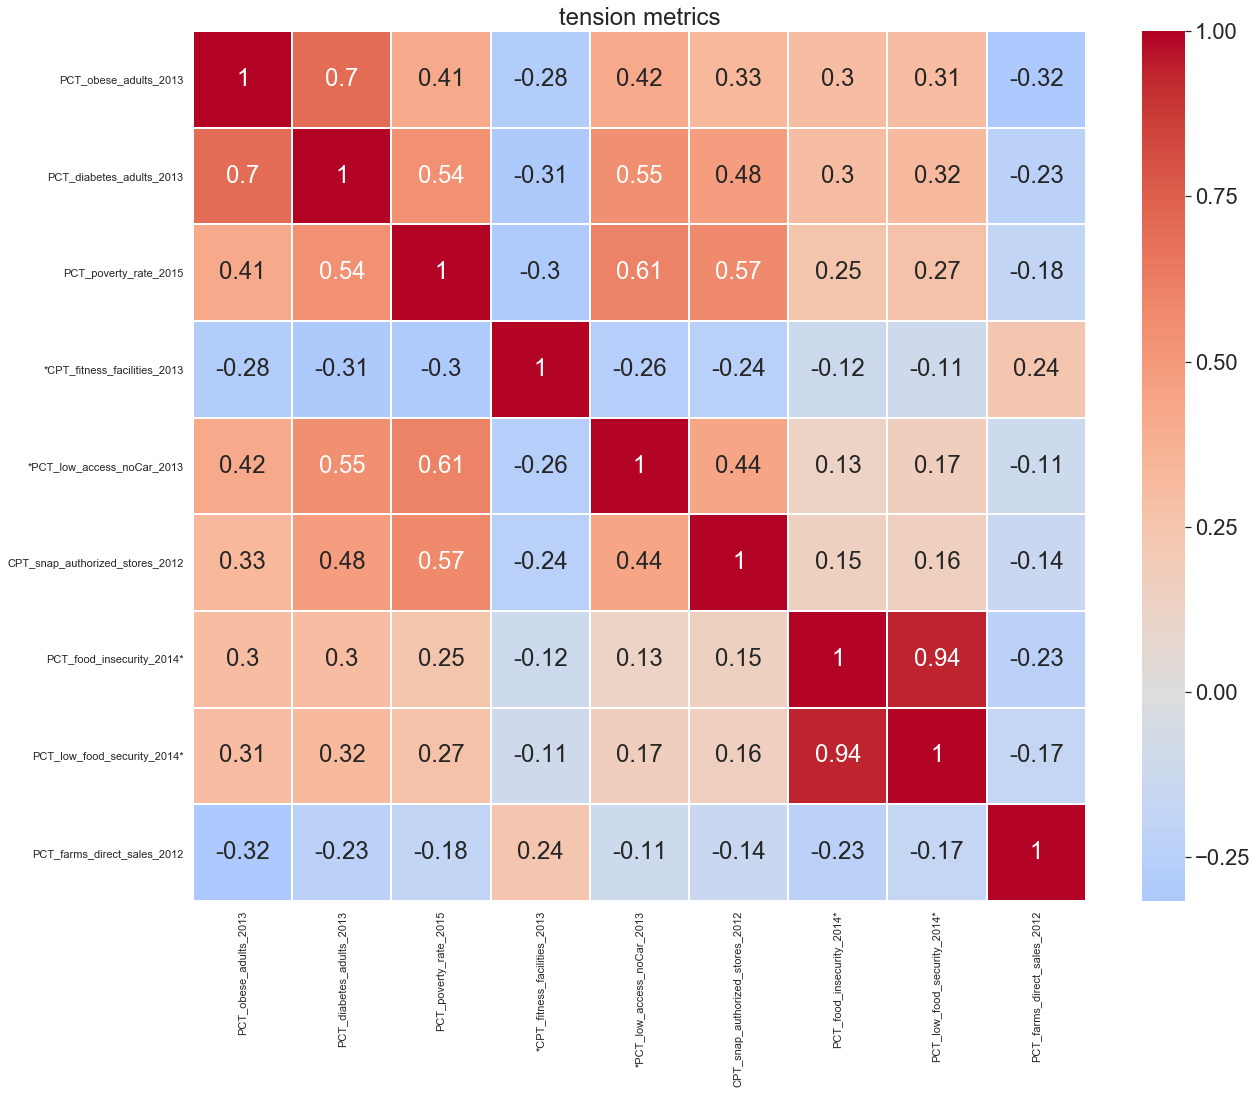

In [38]:
df_linear_regression = df = df_health[['fips','county','state','PCT_obese_adults_2013','PCT_diabetes_adults_2013']]
df_linear_regression = merge_to_base(df_linear_regression, df_poverty[['fips','county','state', 'PCT_poverty_rate_2015']])
df_linear_regression = merge_to_base(df_linear_regression, df_fitness[['fips','county','state', "*CPT_fitness_facilities_2013"]])
df_linear_regression = merge_to_base(df_linear_regression, df_access[['fips','county','state',"*PCT_low_access_noCar_2013"]])
df_linear_regression = merge_to_base(df_linear_regression, df_stores[['fips','county','state',"CPT_snap_authorized_stores_2012"]])
df_linear_regression = merge_to_base(df_linear_regression, df_insecurity[['fips','county','state',"PCT_food_insecurity_2014*", "PCT_low_food_security_2014*"]])
df_linear_regression = merge_to_base(df_linear_regression, df_local[['fips','county','state',"PCT_farms_direct_sales_2012"]])


df_linear_regression_heatmap = df_linear_regression.drop(['fips','county','state'], axis=1)
df_linear_regression_heatmap = df_linear_regression_heatmap.dropna()
fig, ax = plt.subplots(figsize=(20,16)) 
sns.set(font_scale=2)
sns.heatmap(df_linear_regression_heatmap.corr(), ax=ax, cmap='coolwarm', center=0, linewidth=1, annot=True).set_title("tension metrics")

df_linear_regression = merge_to_base(df_linear_regression, df_ethnical)
df_linear_regression.head()

In [39]:
'''
fig, ax = plt.subplots()
#sns.heatmap(df_linear_regression, ax=ax, cmap='inferno', linewidth=0.1, annot=True).set_title("Relevante Korrelationsfakten")
#sns.heatmap(df_linear_regression, annot=True, fmt="g", cmap='viridis')
df_linear_regression = df_linear_regression.pivot("PCT_obese_adults_2013")
'''

df_linear_regression = df_linear_regression.drop(['fips','county','state'], axis=1)
df_linear_regression = df_linear_regression_heatmap.dropna()

In [40]:
x = df_linear_regression.drop(["PCT_obese_adults_2013"], axis=1)
y = df_linear_regression['PCT_obese_adults_2013']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=101)
lm.fit(x_train, y_train)
df_coefficients = pd.DataFrame(lm.coef_, x.columns, columns=["Coefficients"])
df_coefficients

,Coefficients
PCT_diabetes_adults_2013,1.168278
PCT_poverty_rate_2015,0.000418
*CPT_fitness_facilities_2013,-0.300320
*PCT_low_access_noCar_2013,0.126281
CPT_snap_authorized_stores_2012,-0.305264
PCT_food_insecurity_2014*,0.141917
PCT_low_food_security_2014*,0.015442
PCT_farms_direct_sales_2012,-0.087378


In [41]:
predictions = lm.predict(x_test)
predictions

array([31.40567482, 23.18666388, 30.72066742, ..., 28.43166599,
       37.95393906, 29.42387668])

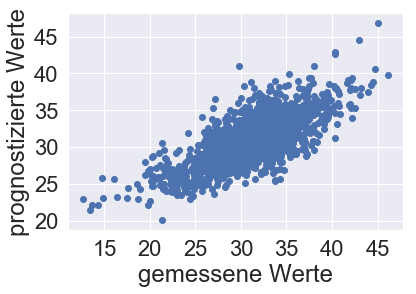

In [42]:
plt.scatter(y_test,predictions)
sns.set(font_scale=1)
plt.xlabel("gemessene Werte")
plt.ylabel("prognostizierte Werte")
plt.show()

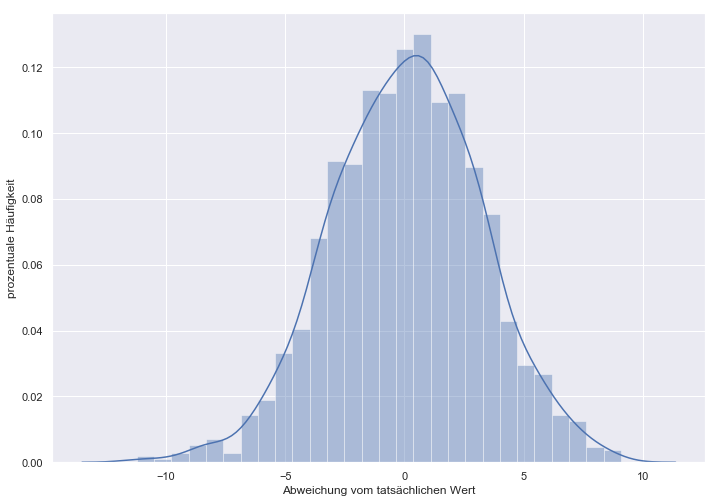

In [56]:
sns.distplot((y_test-predictions))
sns.set(font_scale=2.0)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel("Abweichung vom tatsächlichen Wert")
plt.ylabel("prozentuale Häufigkeit")
plt.show()

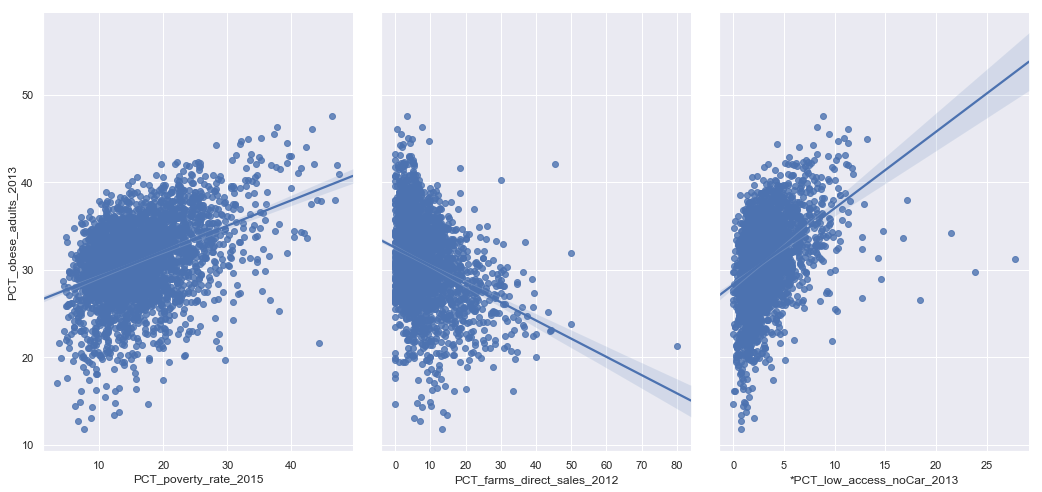

In [44]:
sns.pairplot(df_linear_regression, x_vars=['PCT_poverty_rate_2015','PCT_farms_direct_sales_2012', '*PCT_low_access_noCar_2013'], y_vars='PCT_obese_adults_2013', size=7, aspect=0.7, kind='reg')
sns.set(font_scale=1)

plt.show()

In [45]:
matrix = np.array([y_test,predictions]).transpose()
df_verify = pd.DataFrame(matrix, columns=['test','predict'])
df_verify.head()

,test,predict
0,32.5,31.405675
1,16.4,23.186664
2,29.8,30.720667
3,30.4,31.355588
4,37.9,34.289651


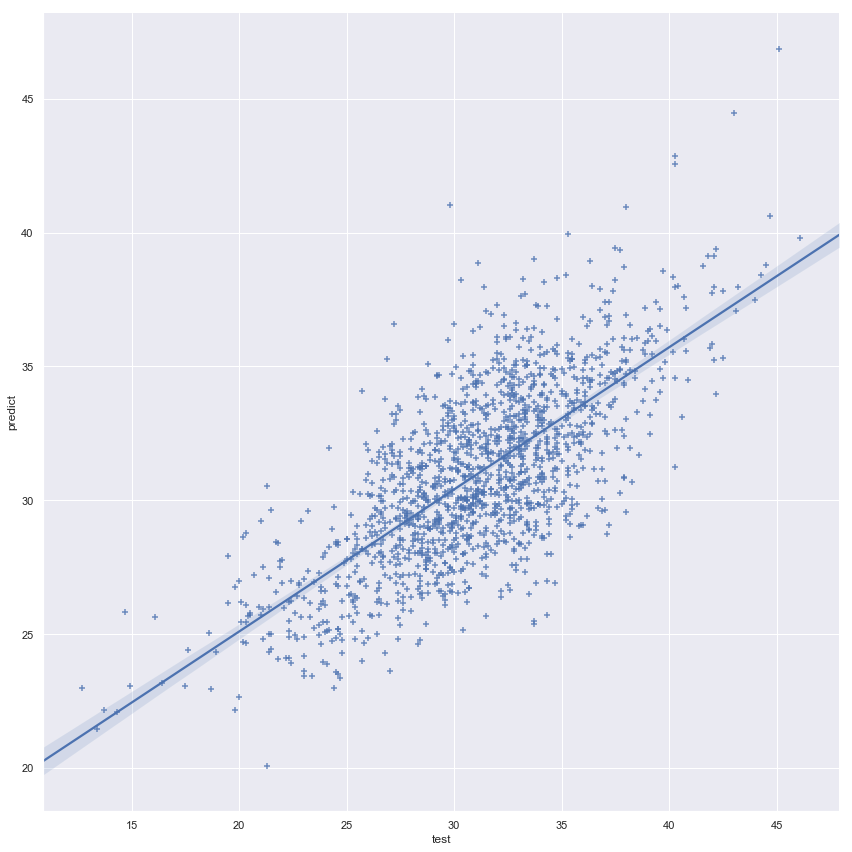

In [46]:
sns.lmplot(x='test', y='predict', data=df_verify, size=12, markers='+')

In [47]:
from sklearn import metrics

In [48]:
metrics.mean_absolute_error(y_test, predictions)

2.5016109677970357

In [49]:
metrics.mean_squared_error(y_test, predictions)

9.835294120028152

In [50]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

3.136127248698329

In [51]:
metrics.r2_score(y_test, predictions)

0.5133198495459658